# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby("type").count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby("type").sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares / total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares / total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_dict = {"Total Rides": total_rides, 
"Total Drivers": total_drivers, 
"Total Fares": total_fares,
"Average Fare per Ride" : average_fare_per_ride,
"Average Fare per Driver": average_fare_per_driver}
pyber_summary_df = pd.DataFrame(pyber_summary_dict)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
pyber_df = pd.concat([total_rides, total_drivers, total_fares, average_fare_per_ride, average_fare_per_driver], axis=1)
pyber_df

,ride_id,driver_count,fare,0,1
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
weekly_fares_df = pd.DataFrame(pyber_data_df.groupby(["date","type"]).sum()["fare"])
weekly_fares_df

,,fare
date,type,
2019-01-01 00:08:16,Urban,$37.91
2019-01-01 00:46:46,Suburban,$47.74
2019-01-01 02:07:24,Suburban,$24.07
2019-01-01 03:46:50,Urban,$7.57
2019-01-01 05:23:21,Urban,$10.75
...,...,...
2019-05-08 04:20:00,Urban,$21.99
2019-05-08 04:39:49,Urban,$18.45
2019-05-08 07:29:01,Urban,$18.55


In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
weekly_fares_df = weekly_fares_df.reset_index()
weekly_fares_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,$37.91
1,2019-01-01 00:46:46,Suburban,$47.74
2,2019-01-01 02:07:24,Suburban,$24.07
3,2019-01-01 03:46:50,Urban,$7.57
4,2019-01-01 05:23:21,Urban,$10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,$21.99
2371,2019-05-08 04:39:49,Urban,$18.45
2372,2019-05-08 07:29:01,Urban,$18.55
2373,2019-05-08 11:38:35,Urban,$19.77


In [32]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
weekly_fares_pivot = weekly_fares_df.pivot(index='date', columns='type', values='fare').reset_index()
weekly_fares_pivot

type,date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,NaN,NaN,$37.91
1,2019-01-01 00:46:46,NaN,$47.74,NaN
2,2019-01-01 02:07:24,NaN,$24.07,NaN
3,2019-01-01 03:46:50,NaN,NaN,$7.57
4,2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...,...
2370,2019-05-08 04:20:00,NaN,NaN,$21.99
2371,2019-05-08 04:39:49,NaN,NaN,$18.45
2372,2019-05-08 07:29:01,NaN,NaN,$18.55
2373,2019-05-08 11:38:35,NaN,NaN,$19.77


In [34]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range = (weekly_fares_pivot['date'] > '2019-01-01') & (weekly_fares_pivot['date'] < '2019-04-29')
date_range_df = weekly_fares_pivot.loc[date_range]
date_range_df


type,date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,NaN,NaN,$37.91
1,2019-01-01 00:46:46,NaN,$47.74,NaN
2,2019-01-01 02:07:24,NaN,$24.07,NaN
3,2019-01-01 03:46:50,NaN,NaN,$7.57
4,2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...,...
2191,2019-04-28 14:28:36,NaN,NaN,$11.46
2192,2019-04-28 16:29:16,NaN,NaN,$36.42
2193,2019-04-28 17:26:52,NaN,NaN,$31.43
2194,2019-04-28 17:38:09,NaN,$34.87,NaN


In [40]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_range_df.index = pd.to_datetime(date_range_df.date)

In [41]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2196 non-null   datetime64[ns]
 1   Rural     114 non-null    float64       
 2   Suburban  573 non-null    float64       
 3   Urban     1509 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 85.8 KB


In [42]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_range_resample_df = date_range_df.resample("W").sum()
date_range_resample_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


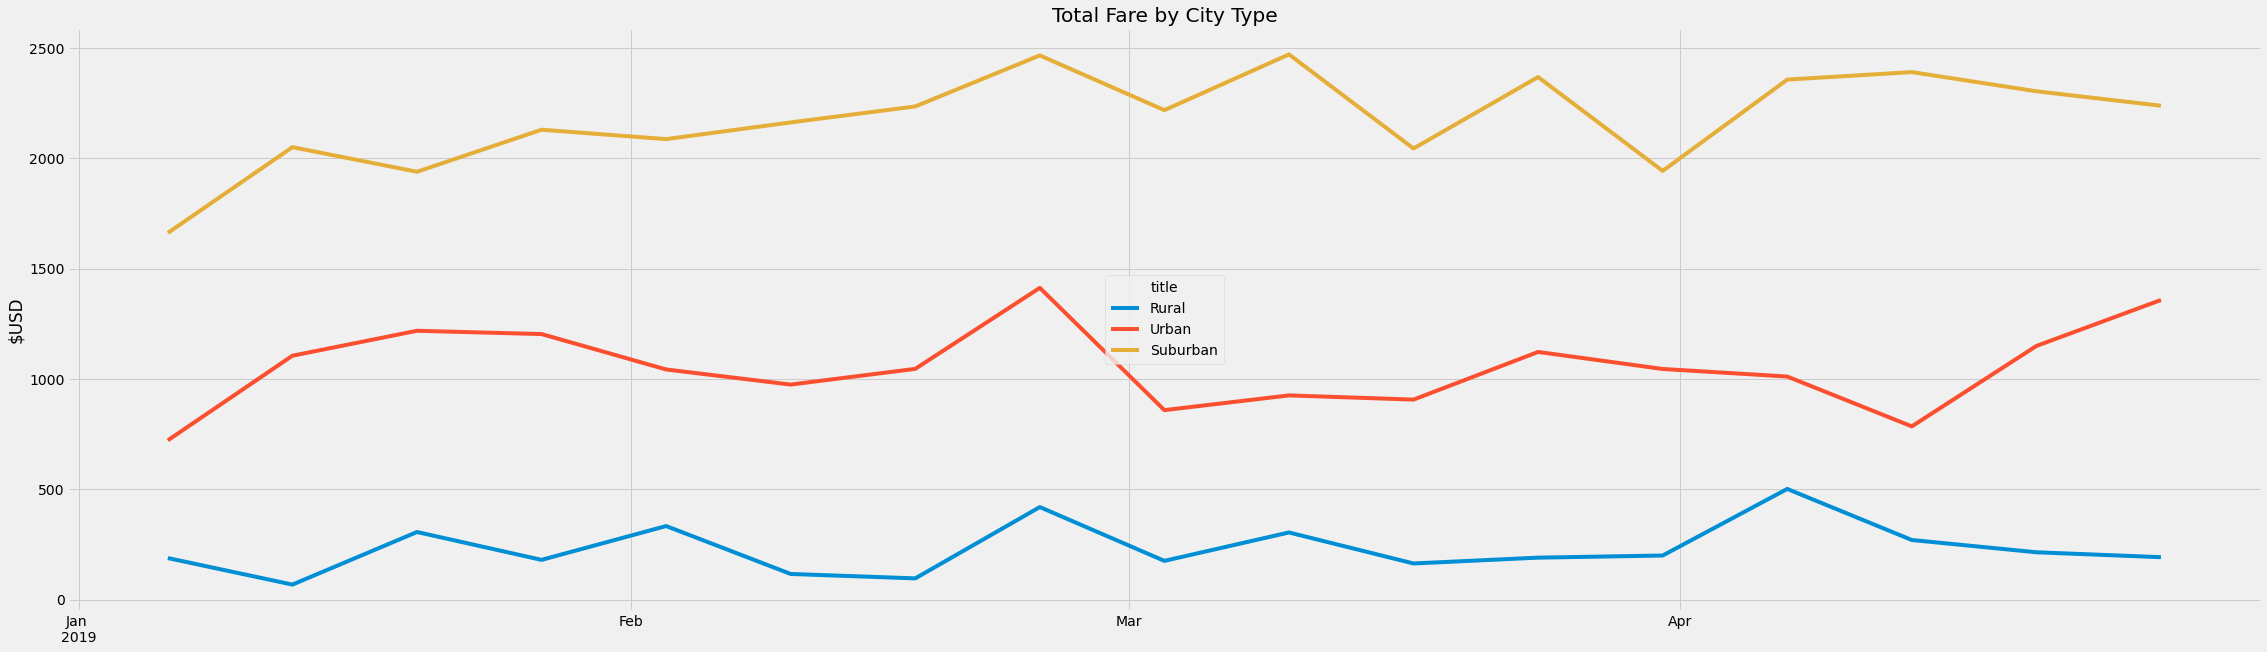

In [133]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

fig, ax = plt.subplots(figsize=(35,10))
ax.plot(date_range_resample_df)
ax.set_xticks(["2019-01-01", "2019-02-01", "2019-03-01", "2019-04-01"], ["Jan \n2019", "Feb", "Mar", "Apr"])
plt.ylabel("$USD")
plt.title("Total Fare by City Type")
plt.legend(['Rural', 'Suburban', 'Urban'], loc='center', title='title')
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig.savefig('PyBer_fare_summary.png')

